In [29]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma    
)

In [9]:
! pip install imgaug --user -U

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 948 kB 388 kB/s eta 0:00:01
ERROR: albumentations 0.4.5 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.6
    Uninstalling imgaug-0.2.6:
      Successfully uninstalled imgaug-0.2.6
You should consider upgrading via the '/home/aladdin1/anaconda3/bin/python -m pip install --upgrade pip' command.


In [14]:
import numpy as np
import imgaug.augmenters as iaa

# Standard scenario: You have N=16 RGB-images and additionally one segmentation
# map per image. You want to augment each image and its heatmaps identically.
images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
segmaps = np.random.randint(0, 10, size=(16, 64, 64, 1), dtype=np.int32)

seq = iaa.Sequential([
    iaa.GaussianBlur((0, 3.0)),
    iaa.Affine(translate_px={"x": (-40, 40)}),
    iaa.Crop(px=(0, 10))
])

images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)

TypeError: 'Sequential' object is not callable

In [7]:
seq?

In [47]:

def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [48]:
from file_cache import *

2020-05-28 15:59:15,462 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/brain_seg/


In [49]:
# fold = '/share/data2/body/brain/train/label/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/2'

# for img in glob(f'{fold}/*'):
#     print(img)
#     show_img_file(img)
    

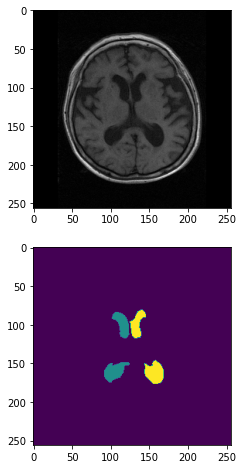

In [50]:
image_file = '/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/2/MR1312060094-Du RuTan_9.DCM_08_01898.png'
mask_file = '/share/data2/body/brain/train/label/iNPH_MRI_PROCESSED/MR1312060094-Du RuTan/2/MR1312060094-Du RuTan_9.DCM_08_01898.png'

image = cv2.imread(image_file)
mask = cv2.imread(mask_file, 0)

# show_img_file(image_file)
# show_img_file(mask_file)

visualize(image, mask)

In [6]:
import albumentations as A
aug = A.Compose({
    A.Resize(200, 300),
    A.CenterCrop(100, 100),
    A.RandomCrop(80, 80),
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=(-90, 90)),
    A.VerticalFlip(p=0.5),
    A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    })

In [7]:
from torchvision import transforms
resize_img = transforms.Compose([transforms.ToTensor(),
                                 # transforms.Lambda(lambda x: x.repeat(3, 1, 1) ),
                                 transforms.ToPILImage(),
                                 transforms.Resize((224, 224)),
                                 RandomRotate90(p=1),
                                 #transforms.ToTensor(),
                                 ])

In [9]:
plt.imshow(resize_img(image))

TypeError: __call__() takes 1 positional argument but 2 were given

2020-05-28 16:37:33,643 image.py[709] WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3) (256, 256)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (80, 80, 3) (80, 80)


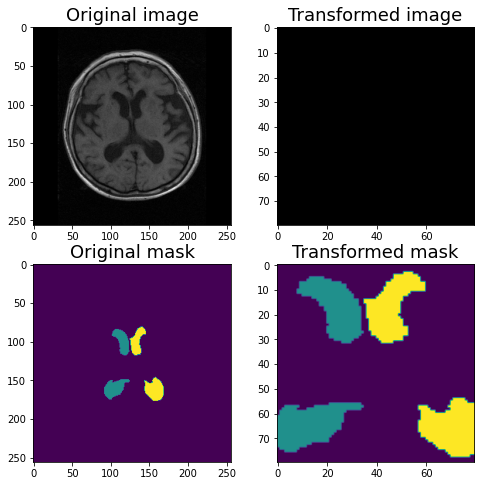

In [76]:
# https://debuggercafe.com/image-augmentation-using-pytorch-and-albumentations/

from albumentations.augmentations.functional import *
print(image.shape, mask.shape)
image_size = 224
import albumentations as A

aug_mini = A.Compose([
        
        A.VerticalFlip(p=0.5),
        A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        
])


aug = A.Compose([
        A.Resize(200, 300),
        A.CenterCrop(100, 100),
        A.RandomCrop(80, 80),
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=(-90, 90)),
        aug_mini,
        
])


augmented = aug(image=image.copy(), mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(type(image_padded), type(mask_padded), image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)

In [15]:
augmented['replay']

{'__class_fullname__': 'albumentations.core.composition.ReplayCompose',
 'params': None,
 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.CenterCrop',
   'always_apply': True,
   'p': 1,
   'height': 100,
   'width': 100,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.Resize',
   'always_apply': False,
   'p': 1,
   'height': 512,
   'width': 512,
   'interpolation': 1,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.RandomCrop',
   'always_apply': True,
   'p': 1,
   'height': 80,
   'width': 80,
   'params': {'h_start': 0.9288144487558304, 'w_start': 0.5906405308338867},
   'applied': True}],
 'applied': True}

In [10]:
augmented['replay']

{'__class_fullname__': 'albumentations.core.composition.ReplayCompose',
 'params': None,
 'transforms': [{'__class_fullname__': 'albumentations.augmentations.transforms.Resize',
   'always_apply': False,
   'p': 1,
   'height': 512,
   'width': 512,
   'interpolation': 1,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.CenterCrop',
   'always_apply': True,
   'p': 1,
   'height': 100,
   'width': 100,
   'params': {},
   'applied': True},
  {'__class_fullname__': 'albumentations.augmentations.transforms.RandomCrop',
   'always_apply': True,
   'p': 1,
   'height': 80,
   'width': 80,
   'params': {'h_start': 0.5608852820974989, 'w_start': 0.5301677252154379},
   'applied': True}],
 'applied': True}

In [1]:
import albumentations as A
import albumentations as A
A.ReplayCompose?

In [392]:
! pip install albumentations -U

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 116 kB 230 kB/s eta 0:00:01
     |████████████████████████████████| 631 kB 237 kB/s eta 0:00:01
  Created wheel for albumentations: filename=albumentations-0.4.5-py3-none-any.whl size=64374 sha256=04cc3561c811d9e71703f93b2446f1548030f017f914516cb135788c02dd4b8d
  Stored in directory: /share/felix/.cache/pip/wheels/06/64/dd/a501b934118600c1c413366b11f02c2fb13272350d8ca24eaa
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654018 sha256=c6ce891d090bac6b1eea1aba0770cf084f1a5c7103e5f2be508229657ff30ca5
  Stored in directory: /share/felix/.cache/pip/wheels/f8/57/bc/5355e8f566105b0adae10859a728a03bf25700cf9fd0c65faf
Successfully built albumentations imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled 

In [351]:
A.RandomCrop?

In [11]:
original_height, original_width = image.shape[:2]

(256, 256, 3) (256, 256)


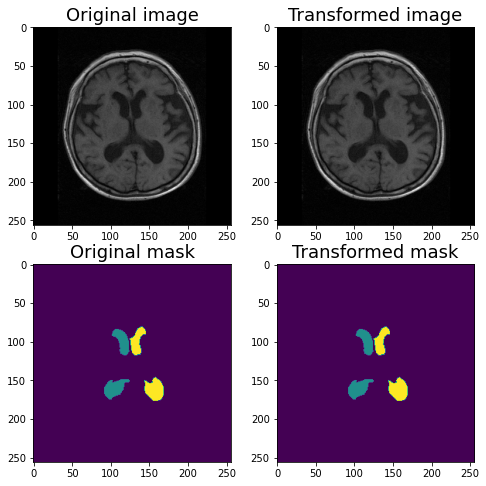

In [34]:
aug = CenterCrop(p=1, height=original_height, width=original_width)

augmented = aug(image=image_padded, mask=mask_padded)

image_center_cropped = augmented['image']
mask_center_cropped = augmented['mask']

print(image_center_cropped.shape, mask_center_cropped.shape)

assert (image - image_center_cropped).sum() == 0
assert (mask - mask_center_cropped).sum() == 0

visualize(image_padded, mask_padded, original_image=image_center_cropped, original_mask=mask_center_cropped)

In [6]:
from fastai.vision import SegmentationItemList
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from file_cache import *
from fastai.vision import imagenet_stats


@lru_cache()
def get_df():
    img_file_list = glob('/share/data2/body/brain/train/image/*MRI*/**/*.*', recursive=True)

    df = pd.DataFrame({'img_file': img_file_list})
    df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
    df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
    df.sort_values('p_id')

    df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))
    
    df['valid'] =  df.img_file!=file
    df.valid.iloc[-1] = False  
    #df['valid'] = df.p_id % 5 == 1

    print(df.valid.value_counts())
    return df

df = get_df()
src = (SegmentationItemList.from_df(df, path='/', cols='img_file' )
       .split_from_df(col='valid')
       # .label_from_func(get_y_fn, classes=codes)
       .label_from_df(cols='label_path', classes=range(5))
       )
# .label_from_func(cols='label_path', classes=codes))

print(len(src.train), len(src.valid))


import ipdb


# get_transforms()
data = (src.transform(None, size=224, tfm_y=True) #(src.transform(None, size=224, tfm_y=True)
        .databunch(bs=2)
       .normalize(imagenet_stats)
       )

print(type(data))
#ipdb.set_trace()
#data = data.
# print(type(data))
# type(src.transform(None, tfm_y=False).databunch(bs=8))



for a, b in data.train_dl:#.new(shuffle=False):
    print('===', a.shape, b.shape)
    
    for img, mask in zip(a, b):
        print(img.sum())
#ipdb.set_trace()
for a, b in data.train_ds:
    print(a.data.sum(), a.data.shape)
print(data.train_ds.items)
print(type(data.train_ds))


##### 26772.9180

True     1011
False       2
Name: valid, dtype: int64
2 1011
<class 'fastai.vision.data.ImageDataBunch'>
=== torch.Size([2, 3, 224, 224]) torch.Size([2, 1, 224, 224])
tensor(-179748.1875, device='cuda:0')
tensor(-190065.0469, device='cuda:0')
tensor(26937.5605) torch.Size([3, 224, 224])
tensor(24606.1582) torch.Size([3, 224, 224])
['///share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png'
 '///share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00010496-Ma ZhongYi/2/MRMR00010496-Ma ZhongYi_16.DCM_15_00000.png']
<class 'fastai.data_block.LabelList'>


In [ ]:
###tensor(-179748.2031)

In [31]:
from fastai.vision import imagenet_stats
a = torch.rand(3, 224, 224)
print(a.sum(), a.shape)
from fastai.vision.data import *

tmp = transforms.Normalize(*imagenet_stats)(a)
#print(normalize(a, torch.Tensor(imagenet_stats[0]),  torch.Tensor(imagenet_stats[1])).sum())
print(tmp.sum())

tensor(75276.3438) torch.Size([3, 224, 224])
tensor(34162.1641)


In [14]:
def denormalize(x: torch.Tensor , mean: torch.Tensor = torch.Tensor(imagenet_stats[0]),
                std: torch.Tensor = torch.Tensor(imagenet_stats[1]),
                do_x: bool = True) -> torch.Tensor :
    "Denormalize `x` with `mean` and `std`."
    return x.cpu().float() * std[..., None, None] + mean[..., None, None] if do_x else x.cpu()

denormalize(tmp).sum()

tensor(75197.7891)

In [29]:
b= torch.stack([a[0]]*3)
print(a.shape, b.shape)
torch.cat([a, b ], dim=1).shape

torch.Size([3, 224, 224]) torch.Size([3, 224, 224])


torch.Size([3, 448, 224])

In [24]:
.shape

torch.Size([1, 224, 224])

In [57]:
torch.Tensor(imagenet_stats[0])[..., None, None]

tensor([[[0.4850]],

        [[0.4560]],

        [[0.4060]]])

In [88]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [54]:
# tensor(45652.4258)
# tensor(26772.9180)

data.train_ds.items

array(['///share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png',
       '///share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00010496-Ma ZhongYi/2/MRMR00010496-Ma ZhongYi_16.DCM_15_00000.png'],
      dtype='<U135')

In [16]:
from fastai.data_block import LabelList
from fastai.vision.data import ImageList
img = open_image(file, 'RGB')
img_list = ImageList.from_df(df.loc[df.valid], path='/', cols= 'img_file')
LabelList(img_list, img_list)

data = (img_list.transform(None, size=(224, 224), tfm_y=True) #(src.transform(None, size=224, tfm_y=True)
        .databunch(bs=2)
        #.normalize(None)
       )

AttributeError: 'ImageList' object has no attribute 'transform'

In [28]:
src = (SegmentationItemList.from_df(df, path='/', cols='img_file')
       .split_from_df(col='valid')
       # .label_from_func(get_y_fn, classes=codes)
       .label_from_df(cols='label_path', classes=range(5))
       )
#ipdb.set_trace()
print(1, type(src))
data = src.transform(None, size=224, tfm_y=True)
 
print(2, type(data))
print(2, data.train[0][0].data.numpy().sum())
# plt.hist(data.train[0][0].data.numpy().flatten(), bins=100)
# plt.show()

# data = data.databunch(bs=8)
# print(3, data.train_ds[0][0].data.shape) 
# print(3, data.train_ds[0][0].data.numpy().sum())
# plt.hist(data.train_ds[0][0].data.numpy().flatten(), bins=100)

1 <class 'fastai.data_block.LabelLists'>
2 <class 'fastai.data_block.LabelLists'>
> /home/aladdin1/anaconda3/lib/python3.7/site-packages/fastai/data_block.py(654)__getitem__()
    653             if self.tfms or self.tfmargs:
18> 654                 x = x.apply_tfms(self.tfms, **self.tfmargs)
    655             if hasattr(self, 'tfms_y') and self.tfm_y and self.item is None:

ipdb> type(x)
<class 'fastai.vision.image.Image'>
ipdb> s
--Call--
> /home/aladdin1/anaconda3/lib/python3.7/site-packages/fastai/vision/image.py(96)apply_tfms()
     95 
---> 96     def apply_tfms(self, tfms:TfmList, do_resolve:bool=True, xtra:Optional[Dict[Callable,dict]]=None,
     97                    size:Optional[Union[int,TensorImageSize]]=None, resize_method:ResizeMethod=None,

ipdb> locals()
{'self': Image (3, 320, 290), 'tfms': None, 'do_resolve': True, 'xtra': None, 'size': 224, 'resize_method': None, 'mult': None, 'padding_mode': 'reflection', 'mode': 'bilinear', 'remove_out': True}
ipdb> c
2 26772.91

In [15]:
data.train


LabelList (836 items)
x: SegmentationItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: SegmentationLabelList
ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224),ImageSegment (1, 224, 224)
Path: /

(array([84198., 50493.,  4152.,  3360., ...,   102.,    30.,     3.,     3.]),
 array([0.  , 0.01, 0.02, 0.03, ..., 0.97, 0.98, 0.99, 1.  ], dtype=float32),
 <a list of 100 Patch objects>)

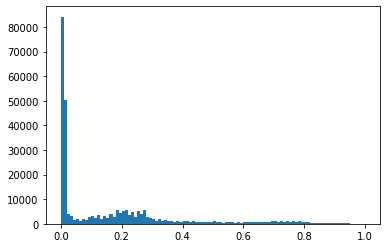

In [87]:
a = data.train_ds[i][0]
plt.hist(a.data.flatten(), bins=100)
#a.apply_tfms(None, do_resolve=True)
 

======== train
False    836
True     177
Name: valid, dtype: int64
0
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png
1
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_6.DCM_05_00166.png
2
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_18.DCM_17_00000.png
3
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_10.DCM_09_02900.png
4
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_15.DCM_14_00000.png
5
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_5.DCM_04_00196.png
6
/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_1.DCM_00_00000.png
7
/sha

2020-05-28 19:48:40,553 image.py[709] WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 320, 290]) torch.Size([8, 320, 290])
tensor(255.) tensor(1.) tensor(45652.4180)


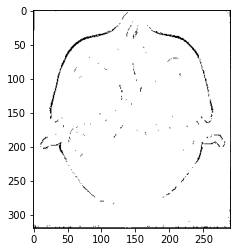

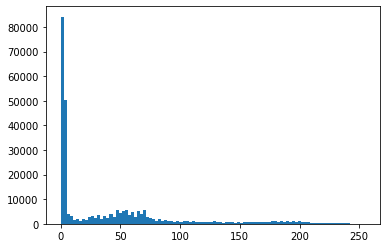

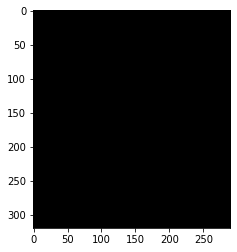

In [24]:
import albumentations as A
import torch
class DataSet_brain(Dataset):

    def __init__(self, ds_type='train', imgaug=True):
        self.image_size = 256
        self.ds_type = ds_type
        self.imgaug = imgaug

        df = self.get_df()

        if ds_type == 'train':
            print('========', ds_type)
            print(df.valid.value_counts())
            self.df = df.loc[df.valid == False]
        elif ds_type == 'valid':
            self.df = df.loc[df.valid == True]

        imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        self.aug_valid = A.Compose([
            #A.CenterCrop(300, 300, p=0.5),
            #A.Resize(224, 224),
            #A.Normalize(*imagenet_stats),
        ])

#         self.aug = A.Compose([
#             A.Resize(512, 512),
#             A.CenterCrop(300, 300, p=0.5),
#             #A.RandomCrop(80, 80),
#             A.HorizontalFlip(p=0.5),
#             A.Rotate(limit=(-90, 90)),
#             A.VerticalFlip(p=0.5),

#             self.aug_valid,
#         ])



    @lru_cache()
    def get_df(self):

        img_file_list = glob('/share/data2/body/brain/train/image/*MRI*/**/*.*', recursive=True)

        df = pd.DataFrame({'img_file': img_file_list})
        df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
        df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
        df.sort_values('p_id')

        df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))

        df['valid'] = df.p_id % 5 == 1

        df.valid.value_counts()
        return df

    def __getitem__(self, index):
        print(index)
        image = self.df.img_file.iloc[index]
        print(image)

        label = self.df.label_path.iloc[index]

        image = cv2.imread(image)
        label = cv2.imread(label, 0)

        if self.imgaug:
            augmented = self.aug(image=np.array(image), mask=label)
        else:
            augmented = self.aug_valid(image=np.array(image), mask=label)

        image = augmented['image']
        label = augmented['mask']

        image = np.transpose(image, (2, 0, 1))#.astype(np.float32)

        return torch.tensor(image, dtype=torch.float), torch.tensor(label).long()


    def __len__(self):
        return len(self.df)

dl = DataLoader(DataSet_brain('train', imgaug=False), batch_size=8, shuffle=False)

for a, b in dl:
    print(a.shape, b.shape)
    
    for img, mask in zip(a, b):
        print(img.max(), img.max()/255, (img/img.max()).sum())
        plt.imshow(img.cpu().numpy() .transpose(1,2, 0), cmap='gray')
        plt.show()
        plt.hist(img.cpu().numpy().flatten(), bins=100)
        plt.show()
        plt.imshow(mask.cpu().squeeze()  , cmap='gray')
        plt.show()
        break
    break

In [31]:
file = '/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png'

import fastai
from fastai.data_block import ItemList, LabelList
a = fastai.vision.data.SegmentationLabelList([file]) 
b = fastai.vision.data.SegmentationItemList([file]) 
c = LabelList(a, b, size=224, tfm_y=True )
# print(a[0].data.shape)
# tmp = c[0][0].data/255.0

# c = (c.split_none().transform(None, size=224, tfm_y=True)
#         .databunch(bs=8)
#         #.normalize(None)
#        )

# plt.hist(c.train_ds[0][0].data.numpy().flatten(), bins=100)
# #ipdb.set_trace()

# plt.show()
print(type(c))
c.transform(tfms=None, size=224, tfm_y=True)


# data = (c.transform(None, size=224, tfm_y=True)
#         .databunch(bs=8)
#         #.normalize(None)
#        )

 

<class 'fastai.data_block.LabelList'>
> /home/aladdin1/anaconda3/lib/python3.7/site-packages/fastai/data_block.py(654)__getitem__()
    653             if self.tfms or self.tfmargs:
18> 654                 x = x.apply_tfms(self.tfms, **self.tfmargs)
    655             if hasattr(self, 'tfms_y') and self.tfm_y and self.item is None:

ipdb> c


LabelList (1 items)
x: SegmentationLabelList
ImageSegment (1, 224, 224)
y: SegmentationItemList
Image (3, 224, 224)
Path: .

(320, 290, 3)


(array([84198., 50493.,  4152.,  3360., ...,   102.,    30.,     3.,     3.]),
 array([0.  , 0.01, 0.02, 0.03, ..., 0.97, 0.98, 0.99, 1.  ]),
 <a list of 100 Patch objects>)

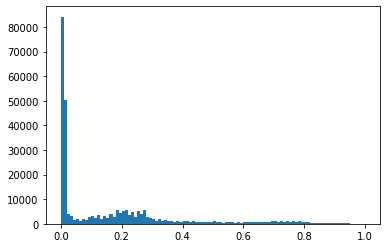

In [75]:
a = cv2.imread(file)
print(a.shape)
plt.hist(a.flatten()/a.max().astype(float), bins=100)

0.9752485


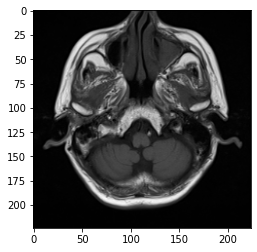

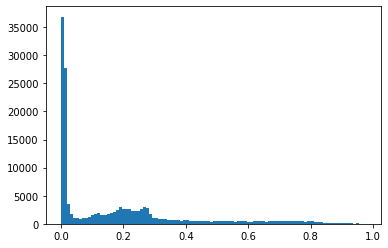

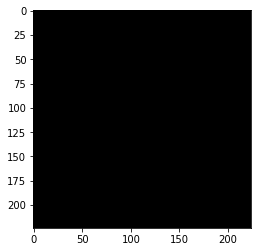

In [61]:
for i in range(10):
    
    print(data.train_ds[i][0].data.numpy().max())
    plt.imshow(data.train_ds[i][0].data.numpy() .transpose(1,2, 0), cmap='gray')
    plt.show()
    plt.hist(data.train_ds[i][0].data.numpy().flatten(), bins=100)
    plt.show()
    plt.imshow(data.train_ds[i][1].data.numpy().squeeze()  , cmap='gray')
    plt.show()
    break

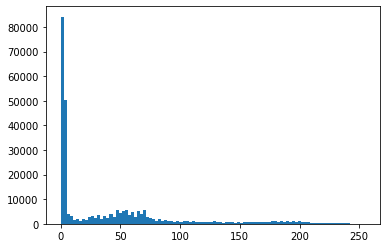

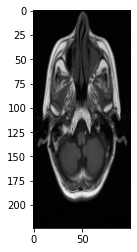

In [111]:
import PIL.Image as Image
tmp = Image.open(file).convert('RGB')
plt.hist(np.array(tmp).flatten(), bins=100)
plt.show()

tmp = tmp.resize((100, 224), 5)

plt.imshow(np.array(tmp))

In [11]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from file_cache import *
import torch
import torch.nn.functional as F
import albumentations as A
from   albumentations.pytorch.transforms import ToTensorV2
#https://debuggercafe.com/image-augmentation-using-pytorch-and-albumentations/
class Resize():
    def __init__(self, size = (3, 224, 224)):
        self.size = size
        self._pad_mode_convert = {'reflection':'reflect', 'zeros':'constant', 'border':'replicate'}
        
    def resize_crop(self, x):
        C, H, W = x.size()
        target_r, target_c = self.size[1:]
        ratio = min(H/target_r, W/target_c)
        return int(round(H/ratio)), int(round(W/ratio))
    
    
    def _crop_pad_default(self, x, size, padding_mode='reflection', row_pct= 0.5, col_pct = 0.5):
        "Crop and pad tfm - `row_pct`,`col_pct` sets focal point."
        padding_mode = self._pad_mode_convert[padding_mode]
        if x.shape[1:] == torch.Size(size): return x
        rows, cols = size
        if x.size(1) < rows or x.size(2) < cols:
            row_pad = max((rows-x.size(1)+1)//2, 0)
            col_pad = max((cols-x.size(2)+1)//2, 0)
            x = F.pad(x[None], (col_pad,col_pad,row_pad,row_pad), mode=padding_mode)[0]
        row = int((x.size(1)-rows+1)*row_pct)
        col = int((x.size(2)-cols+1)*col_pct)
        x = x[:, row:row+rows, col:col+cols]
        return x.contiguous() # without this, get NaN later - don't know why
    
    def _affine_grid(self, size):
        size = ((1,) + size)
        N, C, H, W = size
        grid = torch.FloatTensor(N, H, W, 2)
        linear_points = torch.linspace(-1, 1, W) if W > 1 else torch.Tensor([-1.])
        grid[:, :, :, 0] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, :, 0])
        linear_points = torch.linspace(-1, 1, H) if H > 1 else torch.Tensor([-1.])
        grid[:, :, :, 1] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, :, 1])
        return grid
    
    def _grid_sample(self, x, flow, mode='bilinear', padding_mode='reflection', remove_out=True):
        coords = flow.permute(0, 3, 1, 2).contiguous().permute(0, 2, 3, 1)
        if mode=='bilinear': # hack to get smoother downwards resampling
            mn,mx = coords.min(),coords.max()
            # max amount we're affine zooming by (>1 means zooming in)
            z = 1/(mx-mn).item()*2
            # amount we're resizing by, with 100% extra margin
            d = min(x.shape[1]/coords.shape[1], x.shape[2]/coords.shape[2])/2
            # If we're resizing up by >200%, and we're zooming less than that, interpolate first
            if d>1 and d>z: x = F.interpolate(x[None], scale_factor=1/d, mode='area')[0]
        kwargs = {'mode': mode, 'padding_mode': padding_mode}
        if torch.__version__ > "1.2.0": kwargs['align_corners'] = True
        return F.grid_sample(x[None], coords, **kwargs)[0]
    
    def transform(self, x):
        # x should be Tensor with shape [C, H, W]
        size = self.resize_crop(x)
        
        flow = self._affine_grid((x.size(0),) + size)
        tmp_x = self._grid_sample(x, flow)
        return self._crop_pad_default(tmp_x, self.size[1:])
    
    def __call__(self, x):
        return self.transform(x)


2020-05-29 22:00:07,289 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/brain_seg/


/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png
<class '__main__.Image_ex'> tensor(45652.4258)
☆B torch.float32 torch.Size([3, 320, 290]) tensor(45652.4258) tensor(1.) tensor(0.)
☆A torch.float32 torch.Size([3, 320, 290]) tensor(45652.4180) tensor(1.) tensor(0.)
☆ torch.Size([3, 247, 224]) tensor(27164.6816)
☆ torch.Size([3, 224, 224]) tensor(26937.5605)
tensor(26937.5605)


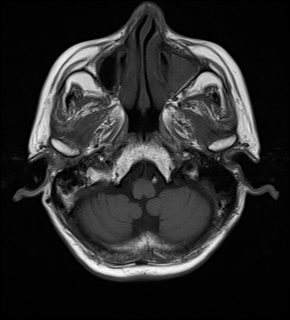

In [7]:
from fastai.vision.image import *
from fastai.vision.image import _resolve_tfms , _get_crop_target, _get_resize_target
from fastai.core import *
from fastai.torch_core import *
class Image_ex(Image):
    def __init__(self, *args ):
        super(Image_ex, self).__init__(*args)
    
        
    def apply_tfms(self, tfms:TfmList, do_resolve:bool=True, xtra:Optional[Dict[Callable,dict]]=None,
                   size:Optional[Union[int,TensorImageSize]]=None, resize_method:ResizeMethod=None,
                   mult:int=None, padding_mode:str='reflection', mode:str='bilinear', remove_out:bool=True)->TensorImage:
        "Apply all `tfms` to the `Image`, if `do_resolve` picks value for random args."
        if not (tfms or xtra or size): return self
        tfms = listify(tfms)
        xtra = ifnone(xtra, {})
        print(type(self), self.data.data.sum())
        default_rsz = ResizeMethod.SQUISH if (size is not None and is_listy(size)) else ResizeMethod.CROP
        resize_method = ifnone(resize_method, default_rsz)
        if resize_method <= 2 and size is not None: tfms = self._maybe_add_crop_pad(tfms)
        tfms = sorted(tfms, key=lambda o: o.tfm.order)
        if do_resolve: _resolve_tfms(tfms)
        print('☆B',  self.data.dtype, self.data.shape, self.data.data.sum(), self.data.data.max(), self.data.data.min())
        x = self.clone()
        print('☆A',  self.data.dtype, x.data.shape, x.data.data.sum(), x.data.data.max(), x.data.data.min())
        x.set_sample(padding_mode=padding_mode, mode=mode, remove_out=remove_out)
        if size is not None:
            crop_target = _get_crop_target(size, mult=mult)
            if resize_method in (ResizeMethod.CROP,ResizeMethod.PAD):
                target = _get_resize_target(x, crop_target, do_crop=(resize_method==ResizeMethod.CROP))
                x.resize(target)
            elif resize_method==ResizeMethod.SQUISH: x.resize((x.shape[0],) + crop_target)
        else: size = x.size
            
        print('☆',  x.data.shape, x.data.data.sum())
        size_tfms = [o for o in tfms if isinstance(o.tfm,TfmCrop)]
        for tfm in tfms:
            if tfm.tfm in xtra: 
                x = tfm(x, **xtra[tfm.tfm])
                 
            elif tfm in size_tfms:
                if resize_method in (ResizeMethod.CROP,ResizeMethod.PAD):
                    x = tfm(x, size=_get_crop_target(size,mult=mult), padding_mode=padding_mode)
                    print('☆',  x.data.shape, x.data.data.sum())
            else: x = tfm(x)
        return x.refresh()
    
file = '/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png'
    
img = open_image(file, 'RGB', cls=Image_ex)
print(file)

img_1 = img.apply_tfms(do_resolve=True, tfms=None, size=224)
print(img_1.data.sum())
plt.show()
img
#目标 26772.9180

In [78]:
a = torch.rand(100, 100, 300)
print(a.shape, a.dtype)
b = a.clone()
a.sum(), b.sum()

torch.Size([100, 100, 300]) torch.float32


(tensor(1500838.3750), tensor(1500838.3750))

In [26]:
type(img)

fastai.vision.image.Image

In [63]:
# from fastai.vision.image import open_image
# from file_cache import *
img = open_image(file, 'RGB')
#print(file)
print(img.data.shape)
tmp = Resize()(img.data)
print(tmp.sum(), tmp.shape)
# img_new = cv2.resize(img.data.cpu().numpy().transpose(1,2,0), (224, 224))
# print(img.data.shape)
# print(img_new.sum(), img_new.shape)
# plt.hist(img_new.flatten(), bins=100)
# plt.show()


img_1 = img.apply_tfms(do_resolve=True, tfms=None, size=224)
#plt.hist(img_1.data.cpu().numpy().flatten(), bins=100)
print(img_1.data.sum())
#plt.show()

img_2 = img.apply_tfms(do_resolve=True, tfms=None, size=(224, 224))
#plt.hist(img_2.data.cpu().numpy().flatten(), bins=100)
print(img_2.data.sum())
#plt.show()

torch.Size([3, 320, 290])
tensor(26937.5605) torch.Size([3, 224, 224])
tensor(26937.5605)
tensor(24620.7578)


(array([35847., 28086.,  3711.,  1743., ...,   111.,    75.,    60.,    30.]),
 array([0.     , 0.0097 , 0.0194 , 0.0291 , ..., 0.94092, 0.95062, 0.96032, 0.97002], dtype=float32),
 <a list of 100 Patch objects>)

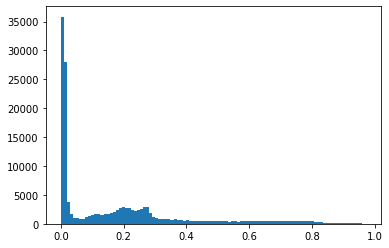

In [21]:
from torchvision import transforms
img = cv2.imread(file)

trans = transforms.Compose([
                      transforms.ToTensor(),
                      Resize()
                     ])

tmp = trans(img) 
plt.hist(tmp.numpy().flatten(), bins=100)

In [1]:
file = '/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00093558-Yang JunSheng/3/MRMR00093558-Yang JunSheng_3.DCM_02_00000.png'
#file = '/share/data2/body/brain/train/image/iNPH_MRI_PROCESSED/MRMR00010496-Ma ZhongYi/2/MRMR00010496-Ma ZhongYi_16.DCM_15_00000.png'
from fastai.vision import imagenet_stats
from fastai.vision.image import open_image
img = open_image(file, 'RGB')
print(img.data.sum())
img = img.apply_tfms(do_resolve=True, size=224, tfms=None)
#plt.hist(img.data.cpu().numpy().flatten(), bins=100)
print(img.data.sum())
#plt.show()
#print(transforms.Normalize(*imagenet_stats)(img.data).sum())

tensor(45652.4258)
tensor(26937.5605)


In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from file_cache import *
import torch
import torch.nn.functional as F
import albumentations as A
#from   albumentations.pytorch.transforms import ToTensorV2
#https://debuggercafe.com/image-augmentation-using-pytorch-and-albumentations/


class Resize():
    def __init__(self, size=(3, 224, 224)):
        self.size = size
        self._pad_mode_convert = {'reflection': 'reflect', 'zeros': 'constant', 'border': 'replicate'}

    def resize_crop(self, x):
        C, H, W = x.size()
        target_r, target_c = self.size[1:]
        ratio = min(H / target_r, W / target_c)
        return int(round(H / ratio)), int(round(W / ratio))

    def _crop_pad_default(self, x, size, padding_mode='reflection', row_pct=0.5, col_pct=0.5):
        "Crop and pad tfm - `row_pct`,`col_pct` sets focal point."
        padding_mode = self._pad_mode_convert[padding_mode]
        if x.shape[1:] == torch.Size(size): return x
        rows, cols = size
        if x.size(1) < rows or x.size(2) < cols:
            row_pad = max((rows - x.size(1) + 1) // 2, 0)
            col_pad = max((cols - x.size(2) + 1) // 2, 0)
            x = F.pad(x[None], (col_pad, col_pad, row_pad, row_pad), mode=padding_mode)[0]
        row = int((x.size(1) - rows + 1) * row_pct)
        col = int((x.size(2) - cols + 1) * col_pct)
        x = x[:, row:row + rows, col:col + cols]
        return x.contiguous()  # without this, get NaN later - don't know why

    def _affine_grid(self, size):
        size = ((1,) + size)
        N, C, H, W = size
        grid = torch.FloatTensor(N, H, W, 2)
        linear_points = torch.linspace(-1, 1, W) if W > 1 else torch.Tensor([-1.])
        grid[:, :, :, 0] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, :, 0])
        linear_points = torch.linspace(-1, 1, H) if H > 1 else torch.Tensor([-1.])
        grid[:, :, :, 1] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, :, 1])
        return grid

    def _grid_sample(self, x, flow, mode='bilinear', padding_mode='reflection', remove_out=True):
        coords = flow.permute(0, 3, 1, 2).contiguous().permute(0, 2, 3, 1)
        if mode == 'bilinear':  # hack to get smoother downwards resampling
            mn, mx = coords.min(), coords.max()
            # max amount we're affine zooming by (>1 means zooming in)
            z = 1 / (mx - mn).item() * 2
            # amount we're resizing by, with 100% extra margin
            d = min(x.shape[1] / coords.shape[1], x.shape[2] / coords.shape[2]) / 2
            # If we're resizing up by >200%, and we're zooming less than that, interpolate first
            if d > 1 and d > z: x = F.interpolate(x[None], scale_factor=1 / d, mode='area')[0]
        kwargs = {'mode': mode, 'padding_mode': padding_mode}
        if torch.__version__ > "1.2.0": kwargs['align_corners'] = True
        return F.grid_sample(x[None], coords, **kwargs)[0]

    def transform(self, x):
        # x should be Tensor with shape [C, H, W]
        size = self.resize_crop(x)

        flow = self._affine_grid((x.size(0),) + size)
        tmp_x = self._grid_sample(x, flow)
        return self._crop_pad_default(tmp_x, self.size[1:])

    def __call__(self, x):
        return self.transform(x)



class DataSet_brain(Dataset):

    def __init__(self, ds_type='train', imgaug=True):
        print('DataSet_brain', locals())
        self.image_size = 256
        self.ds_type = ds_type
        self.imgaug = imgaug

        df = self.get_df()

        if ds_type == 'train':
            print('========', ds_type)
            print(df.valid.value_counts())
            self.df = df.loc[df.valid == False]
        elif ds_type == 'valid':
            self.df = df.loc[df.valid == True]

        self.transforms = transforms.Compose([
                      transforms.ToTensor(),
                      Resize(),
                      #transforms.Normalize(*imagenet_stats)
                     ])


    @lru_cache()
    def get_df(self):

        img_file_list = glob('/share/data2/body/brain/train/image/*MRI*/**/*.*', recursive=True)

        df = pd.DataFrame({'img_file': img_file_list})
        df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
        df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
        df.sort_values('p_id')

        df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))

        df['valid'] = df.img_file != file

        df.valid.value_counts()
        return df

    def __getitem__(self, index):

        image = self.df.img_file.iloc[index]
        image = cv2.imread(image)
        #image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        image = self.transforms(image)


        label = self.df.label_path.iloc[index]
        label = cv2.imread(label, 0)
        label = cv2.resize(label, (224, 224))



        return torch.tensor(image, dtype=torch.float), torch.tensor(label).long()


    def __len__(self):
        return len(self.df)

if __name__ == '__main__':

    for sn, (a, b) in enumerate(DataSet_brain()):
        print('===', type(a), type(b), a.shape, b.shape, np.unique(b))
        print(a.sum())
        if sn > 9: break



DataSet_brain {'self': <__main__.DataSet_brain object at 0x7fc1cb058190>, 'ds_type': 'train', 'imgaug': True}
======== train
True     1012
False       1
Name: valid, dtype: int64
=== <class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([3, 224, 224]) torch.Size([224, 224]) [0]
tensor(26937.5605)


In [22]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from file_cache import *
import torch
import torch.nn.functional as F
from fastai.vision import imagenet_stats
import albumentations as A
from   albumentations.pytorch.transforms import ToTensorV2
#https://debuggercafe.com/image-augmentation-using-pytorch-and-albumentations/


class Resize():
    def __init__(self, size=(3, 224, 224)):
        self.size = size
        self._pad_mode_convert = {'reflection': 'reflect', 'zeros': 'constant', 'border': 'replicate'}

    def resize_crop(self, x):
        C, H, W = x.size()
        target_r, target_c = self.size[1:]
        ratio = min(H / target_r, W / target_c)
        return int(round(H / ratio)), int(round(W / ratio))

    def _crop_pad_default(self, x, size, padding_mode='reflection', row_pct=0.5, col_pct=0.5):
        "Crop and pad tfm - `row_pct`,`col_pct` sets focal point."
        padding_mode = self._pad_mode_convert[padding_mode]
        if x.shape[1:] == torch.Size(size): return x
        rows, cols = size
        if x.size(1) < rows or x.size(2) < cols:
            row_pad = max((rows - x.size(1) + 1) // 2, 0)
            col_pad = max((cols - x.size(2) + 1) // 2, 0)
            x = F.pad(x[None], (col_pad, col_pad, row_pad, row_pad), mode=padding_mode)[0]
        row = int((x.size(1) - rows + 1) * row_pct)
        col = int((x.size(2) - cols + 1) * col_pct)
        x = x[:, row:row + rows, col:col + cols]
        return x.contiguous()  # without this, get NaN later - don't know why

    def _affine_grid(self, size):
        size = ((1,) + size)
        N, C, H, W = size
        grid = torch.FloatTensor(N, H, W, 2)
        linear_points = torch.linspace(-1, 1, W) if W > 1 else torch.Tensor([-1.])
        grid[:, :, :, 0] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, :, 0])
        linear_points = torch.linspace(-1, 1, H) if H > 1 else torch.Tensor([-1.])
        grid[:, :, :, 1] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, :, 1])
        return grid

    def _grid_sample(self, x, flow, mode='bilinear', padding_mode='reflection', remove_out=True):
        coords = flow.permute(0, 3, 1, 2).contiguous().permute(0, 2, 3, 1)
        if mode == 'bilinear':  # hack to get smoother downwards resampling
            mn, mx = coords.min(), coords.max()
            # max amount we're affine zooming by (>1 means zooming in)
            z = 1 / (mx - mn).item() * 2
            # amount we're resizing by, with 100% extra margin
            d = min(x.shape[1] / coords.shape[1], x.shape[2] / coords.shape[2]) / 2
            # If we're resizing up by >200%, and we're zooming less than that, interpolate first
            if d > 1 and d > z: x = F.interpolate(x[None], scale_factor=1 / d, mode='area')[0]
        kwargs = {'mode': mode, 'padding_mode': padding_mode}
        if torch.__version__ > "1.2.0": kwargs['align_corners'] = True
        return F.grid_sample(x[None], coords, **kwargs)[0]

    def transform(self, x):
        # x should be Tensor with shape [C, H, W]
        size = self.resize_crop(x)

        flow = self._affine_grid((x.size(0),) + size)
        tmp_x = self._grid_sample(x, flow)
        return self._crop_pad_default(tmp_x, self.size[1:])

    def __call__(self, x):
        return self.transform(x)



class DataSet_brain(Dataset):

    def __init__(self, ds_type='train', imgaug=True):
        print('DataSet_brain', locals())
        self.ds_type = ds_type
        self.imgaug = imgaug

        df = self.get_df()

        if ds_type == 'train':
            print('========', ds_type)
            print(df.valid.value_counts())
            self.df = df.loc[df.valid == False]
        elif ds_type == 'valid':
            self.df = df.loc[df.valid == True]

        self.transforms = transforms.Compose([
                      transforms.ToTensor(),
                      Resize(),
                      #transforms.Normalize(*imagenet_stats)
                     ])


    @lru_cache()
    def get_df(self):

        img_file_list = glob('/share/data2/body/brain/train/image/*MRI*/**/*.*', recursive=True)

        df = pd.DataFrame({'img_file': img_file_list})
        df['p_id_path'] = df.img_file.apply(lambda val: os.path.dirname(val))
        df['p_id'] = df['p_id_path'].rank(method='max').astype(int)
        df.sort_values('p_id')

        df['label_path'] = df.img_file.apply(lambda val: val.replace('image', 'label'))

        df['valid'] = df.img_file != file

        df.valid.value_counts()
        return df

    def __getitem__(self, index):

        image = self.df.img_file.iloc[index]
        image = cv2.imread(image)
        #image = np.transpose(image, (2, 0, 1)).astype(np.float32)
        image = self.transforms(image)


        label = self.df.label_path.iloc[index]
        label = cv2.imread(label, 0)
        label = cv2.resize(label, (224, 224))

        return torch.tensor(image, dtype=torch.float), torch.tensor(label).long()


    def __len__(self):
        return len(self.df)

if __name__ == '__main__':

    for sn, (a, b) in enumerate(DataSet_brain()):
        print('===', a.sum(), type(a), type(b), a.shape, b.shape, np.unique(b))
        if sn > 9: break



DataSet_brain {'self': <__main__.DataSet_brain object at 0x7fd50da57590>, 'ds_type': 'train', 'imgaug': True}
======== train
True     1012
False       1
Name: valid, dtype: int64
=== tensor(24606.1582) <class 'torch.Tensor'> <class 'torch.Tensor'> torch.Size([3, 224, 224]) torch.Size([224, 224]) [0]


In [4]:
from fastai.vision import imagenet_stats
a = data.train_ds[0][0].data
print(a.sum(), a.shape)
from fastai.vision.data import *

print(normalize(a, torch.Tensor(imagenet_stats[0]),  torch.Tensor(imagenet_stats[1])).sum())
print(transforms.Normalize(*imagenet_stats)(a).sum())

NameError: name 'data' is not defined

In [ ]:
# tensor(-179748.1875, device='cuda:0')
# tensor(-190065.0469, device='cuda:0')
# tensor(26937.5605) torch.Size([3, 224, 224])
# tensor(24606.1582) torch.Size([3, 224, 224])